# Intro

This report will be about Delay metrics for our Airline, SouthWest. We will start out with a "State of the industry". This will involve historical trends in the industry as a whole as well of statistics of the current year. We will then do a deep dive into our own numbers, predicting whether or not our planes will be delayed.


In [1]:
import pandas as pd 
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import matplotlib.gridspec as gridspec
import scipy as sp
import sqlite3

%matplotlib inline 

In [2]:
conn = sqlite3.connect("/home/hakim/Documents/Airline_delays-/flight_data_historical/delayed.sqlite3")
df = pd.read_csv('/home/hakim/Documents/Airline_delays-/flight_data_historical/2008.csv')


MemoryError: 

In [ ]:
df.head()

In [ ]:
conditionsArr = [(df['ArrDelay'] > 15)]
choicesArr = [1]
df['isDelArr'] = np.select(conditionsArr, choicesArr, default = 0)

conditionsDep = [(df['DepDelay'] > 15)]
choicesDep = [1]
df['isDelDep'] = np.select(conditionsDep, choicesDep, default = 0)

In [5]:
flightcount = pd.read_sql_query("select distinct Year ,count(Origin) as number_of_flights from delayed where Cancelled != 1 group by Year;", conn)
flightcount.set_index('Year', inplace = True)

# State of the Industry

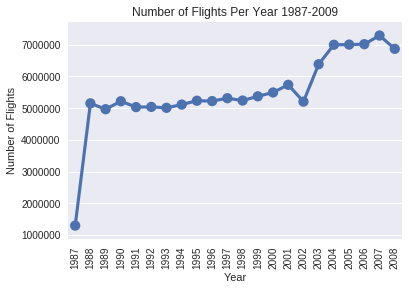

In [6]:
fc = sns.pointplot(x = flightcount.index, y = flightcount.number_of_flights)
fc.set_xticklabels(flightcount.index, rotation=90)
fc.set(xlabel='Year', ylabel='Number of Flights')
fc.set_title('Number of Flights Per Year 1987-2009');

In [10]:
can = pd.read_sql_query("select Year, sum(Cancelled) as Number_Cancelled from delayed group by year;", conn)
can.set_index('Year', inplace = True)

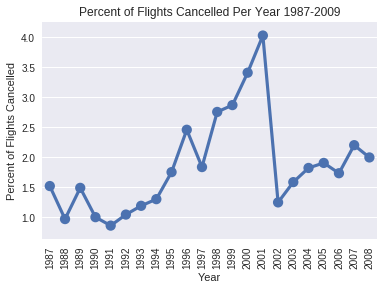

In [28]:
fcan = sns.pointplot(x = can.index, y = can.Number_Cancelled / flightcount.number_of_flights * 100)
fcan.set_xticklabels(can.index, rotation=90)
fcan.set(xlabel='Year', ylabel='Percent of Flights Cancelled')
fcan.set_title('Percent of Flights Cancelled Per Year 1987-2009');

In [29]:
flightsdiverted = pd.read_sql_query("select distinct Year ,sum(Diverted) as Diverted from delayed group by Year;", conn)
flightsdiverted.set_index('Year', inplace = True)

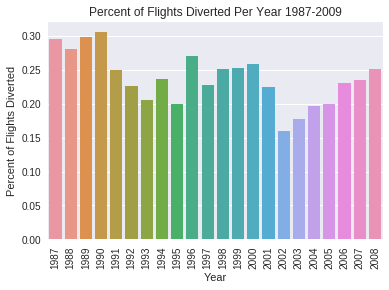

In [32]:
fdiv = sns.barplot(x = flightsdiverted.index, y = flightsdiverted.Diverted / flightcount.number_of_flights * 100)
fdiv.set_xticklabels(flightsdiverted.index, rotation=90)
fdiv.set(xlabel='Year', ylabel='Percent of Flights Diverted')
fdiv.set_title('Percent of Flights Diverted Per Year 1987-2009');

In [66]:
delayarr = pd.read_sql_query("select distinct year,avg(ArrDelay) as ArrDelay from delayed where ArrDelay group by Year;", conn)
delayarr.set_index('Year', inplace = True)

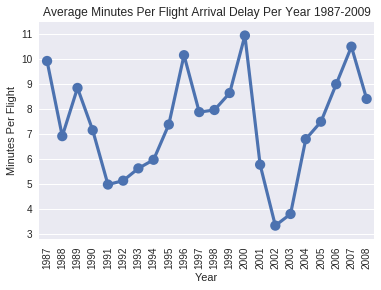

In [67]:
da = sns.pointplot(x = delayarr.index, y = delayarr.ArrDelay)
da.set_xticklabels(delayarr.index, rotation=90);
da.set(xlabel='Year', ylabel='Minutes Per Flight')
da.set_title('Average Minutes Per Flight Arrival Delay Per Year 1987-2009');

In [68]:
delaydep = pd.read_sql_query("select distinct year,avg(DepDelay) as Delay from delayed where DepDelay group by Year;", conn)
delaydep.set_index('Year', inplace = True)

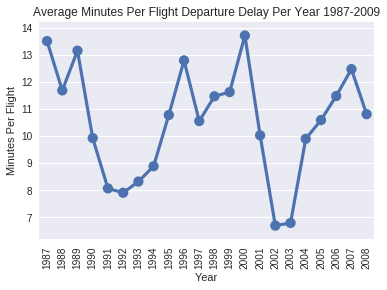

In [69]:
dd = sns.pointplot(x = delaydep.index, y = delaydep.Delay)
dd.set_xticklabels(delaydep.index, rotation=90);
dd.set(xlabel='Year', ylabel='Minutes Per Flight')
dd.set_title('Average Minutes Per Flight Departure Delay Per Year 1987-2009');

In [33]:
delaytrendweather = pd.read_sql_query("select distinct year,sum(WeatherDelay) as weatherdelay from delayed group by year;", conn)
delaytrendweather.set_index('Year', inplace = True)

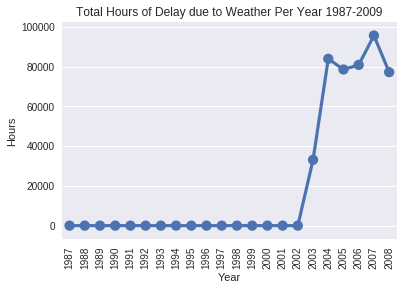

In [36]:
fdw = sns.pointplot(x = delaytrendweather.index, y = delaytrendweather.weatherdelay/60)
fdw.set_xticklabels(delaytrendweather.index, rotation=90)
fdw.set(xlabel='Year', ylabel='Hours')
fdw.set_title('Total Hours of Delay due to Weather Per Year 1987-2009');

In [46]:
delaytrendlateflight= pd.read_sql_query("select Year, sum(CarrierDelay) as delay from delayed group by Year;", conn)
delaytrendlateflight.set_index('Year', inplace=True)

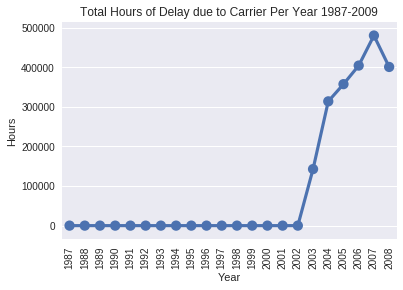

In [48]:
fdlf = sns.pointplot(x = delaytrendlateflight.index, y = delaytrendlateflight.delay/60)
fdlf.set_xticklabels(delaytrendlateflight.index, rotation=90)
fdlf.set(xlabel='Year', ylabel='Hours')
fdlf.set_title('Total Hours of Delay due to Carrier Per Year 1987-2009');

In [43]:
delaytrendsecurity = pd.read_sql_query("select Year, sum(SecurityDelay) as delay from delayed group by Year;", conn)
delaytrendsecurity .set_index('Year', inplace = True)

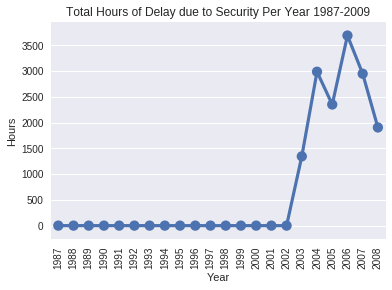

In [49]:
fds = sns.pointplot(x = delaytrendsecurity.index, y = delaytrendsecurity.delay/60)
fds.set_xticklabels(delaytrendsecurity.index, rotation=90)
fds.set(xlabel='Year', ylabel='Hours')
fds.set_title('Total Hours of Delay due to Security Per Year 1987-2009');